# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 5:
Image - Min Value: 3 Max Value: 219
Image - Shape: (32, 32, 3)
Label - Label Id: 3 Name: cat


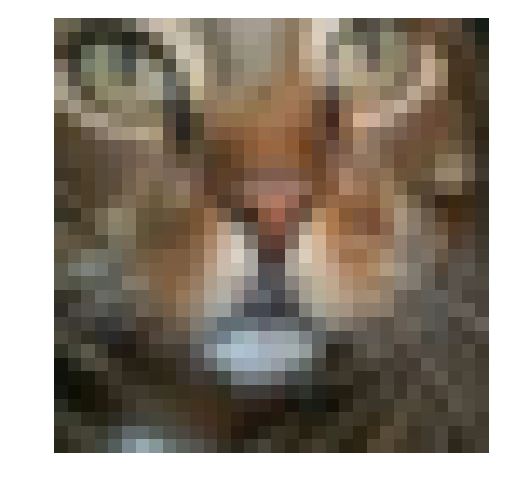

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    #return None
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return np.array(a + ( ( (x - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) ))



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn.preprocessing import OneHotEncoder
map_one_hot = {}
def one_hot_encode(x):
    
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
#     # TODO: Implement Function
# #     s = pd.Series(list(x))
# #     out = pd.get_dummies(s)
# #     return out.values
# #    enc = one_hot_encode()
#     labels = {1,2,3,4,5,6,7,8,9}    
#     labels = list(labels)
#     print('labels' )
        
#     enc = np.zeros((len(x),10))
# #     print(enc)
# #     print(enc.shape)
# #     print(enc.shape[1])
# #     print('fuck' )
# #     print(enc[0][: ])
#     for i,label in enumerate(labels):
#         map_one_hot[label]=i
#     print('encoding' )
#     i = 0
#     for label in x:
#         print('aqui carai :'+str(map_one_hot[label]))
#         enc[i][int(map_one_hot[label])]=1
#         i += 1
#     print(enc)
#     return enc
# #     s = pd.Series(list(x))
# #     print(s)
# #     out = pd.get_dummies(s)
# #     print(np.array(out.values))
# #     return np.array(out.values)
# """
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
# """
# 

    oneHot = OneHotEncoder(n_values=10)
    
    labels = np.array(x).reshape(len(x),1)
    oneHot.fit(labels)
    y = oneHot.transform(labels).toarray()
    return y

tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    ph = tf.placeholder(shape=(None,image_shape[0],image_shape[1],image_shape[2]),name='x',dtype=tf.float32)
    return ph


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    ph = tf.placeholder(shape=(None,n_classes),name='y',dtype=tf.float32)
    return ph


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    ph = tf.placeholder(name='keep_prob',dtype=tf.float32)
    return ph


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [35]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    weight = tf.Variable(tf.truncated_normal(
                [conv_ksize[0], conv_ksize[1], int(x_tensor.shape[3]), conv_num_outputs],mean=0.0,stddev=0.01))
        
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # filter: A Tensor. Must have the same type as input. A 4-D tensor of 
    # shape [filter_height, filter_width, in_channels, out_channels]
    
    # strides: A list of ints. 1-D tensor of length 4. The stride of 
    # the sliding window for each dimension of input. 
    # The dimension order is determined by the value of data_format, see below for details.
    conv_layer = tf.nn.conv2d(x_tensor,
                             filter=weight,
                             strides=[1,conv_strides[0],conv_strides[1],1],
                             padding='SAME',
                             name='conv_1l')
    
    conv_layer = tf.nn.bias_add(conv_layer, bias, name='bias_2l')    
    
    activation = tf.nn.relu(conv_layer,name='act_3l')
    
    maxpool = tf.nn.max_pool(activation,
                             ksize=[1,pool_ksize[0],pool_ksize[1],1],
                             strides=[1,pool_strides[0],pool_strides[1],1],
                             padding='SAME',
                             data_format='NHWC',
                             name= 'maxp_4l')
    return maxpool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function    
    new_tensor = tf.reshape(x_tensor, [-1,
                                       int(x_tensor.get_shape().as_list()[1])*
                                           int(x_tensor.get_shape().as_list()[2])*
                                              int(x_tensor.get_shape().as_list()[3])])
    return new_tensor

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [36]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs,activation_fn=tf.nn.relu)    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [37]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs,activation_fn=None)
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [38]:
import math
def calc_conv2d_outshape(in_size,filter_size,strides):
    out_height = math.ceil(float(in_size[0] - filter_size[0] + 1) / float(strides[1]))
    out_width  = math.ceil(float(in_size[1] - filter_size[1] + 1) / float(strides[2]))
    
    return[out_height,out_width]

In [39]:
calc_conv2d_outshape([32,32],[3,3],[1,1,1,1])

[30, 30]

In [56]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv1 = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[1,1])
    print('shape of conv1 : '+str(conv1.get_shape()))
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    
    conv2 = conv2d_maxpool(conv1,64,[3,3],[1,1],[2,2],[1,1])
    print('shape of conv2 : '+str(conv2.get_shape()))
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    
    #conv3 = conv2d_maxpool(conv2,256,[8,8],[2,2],[4,4],[1,1])
    #print('shape of conv3 : '+str(conv3.get_shape()))
    #conv3 = tf.nn.dropout(conv3, keep_prob)
    
    #conv4 = conv2d_maxpool(conv3,10,[5,5],[2,2],[3,3],[3,3])

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flat1 = flatten(conv2)
    print('shape of flat1 : '+str(flat1.get_shape()))

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc1 = fully_conn(flat1,512)
    fc2 = fully_conn(fc1,10)   
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    out = output(fc2, 10)
    
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

shape of conv1 : (?, 32, 32, 32)
shape of conv2 : (?, 32, 32, 64)
shape of flat1 : (?, 65536)
shape of conv1 : (?, 32, 32, 32)
shape of conv2 : (?, 32, 32, 64)
shape of flat1 : (?, 65536)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [57]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [58]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(cost, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: 1.})
    
    valid_acc = session.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                loss,
                valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [59]:
# TODO: Tune Parameters
epochs = 100
batch_size = 128
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.3065 Validation Accuracy: 0.124000
Epoch  2, CIFAR-10 Batch 1:  

KeyboardInterrupt: 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [61]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.2887 Validation Accuracy: 0.119400
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.3150 Validation Accuracy: 0.164000
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.0805 Validation Accuracy: 0.203000
Epoch  1, CIFAR-10 Batch 4:  Loss:     2.1032 Validation Accuracy: 0.244400
Epoch  1, CIFAR-10 Batch 5:  Loss:     2.0945 Validation Accuracy: 0.267000
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.0569 Validation Accuracy: 0.287800
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.9874 Validation Accuracy: 0.308400
Epoch  2, CIFAR-10 Batch 3:  Loss:     1.8328 Validation Accuracy: 0.315400
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.8483 Validation Accuracy: 0.317200
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.8670 Validation Accuracy: 0.338800
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.0321 Validation Accuracy: 0.347600
Epoch  3, CIFAR-10 Batch 2:  Loss:     1.8442 Validation Accuracy: 0.350400
Epoch  3, CIFAR-10 Batch 3:  Loss:     1.6925 Validation Accuracy: 0.368800


Epoch 22, CIFAR-10 Batch 4:  Loss:     1.5677 Validation Accuracy: 0.441600
Epoch 22, CIFAR-10 Batch 5:  Loss:     1.6112 Validation Accuracy: 0.451000
Epoch 23, CIFAR-10 Batch 1:  Loss:     1.8705 Validation Accuracy: 0.452400
Epoch 23, CIFAR-10 Batch 2:  Loss:     1.5779 Validation Accuracy: 0.449800
Epoch 23, CIFAR-10 Batch 3:  Loss:     1.3423 Validation Accuracy: 0.449000
Epoch 23, CIFAR-10 Batch 4:  Loss:     1.5339 Validation Accuracy: 0.440400
Epoch 23, CIFAR-10 Batch 5:  Loss:     1.6203 Validation Accuracy: 0.450000
Epoch 24, CIFAR-10 Batch 1:  Loss:     1.8607 Validation Accuracy: 0.451400
Epoch 24, CIFAR-10 Batch 2:  Loss:     1.5608 Validation Accuracy: 0.452800
Epoch 24, CIFAR-10 Batch 3:  Loss:     1.3512 Validation Accuracy: 0.452000
Epoch 24, CIFAR-10 Batch 4:  Loss:     1.5385 Validation Accuracy: 0.445400
Epoch 24, CIFAR-10 Batch 5:  Loss:     1.6143 Validation Accuracy: 0.447400
Epoch 25, CIFAR-10 Batch 1:  Loss:     1.8456 Validation Accuracy: 0.445600
Epoch 25, CI

Epoch 44, CIFAR-10 Batch 2:  Loss:     1.4858 Validation Accuracy: 0.469600
Epoch 44, CIFAR-10 Batch 3:  Loss:     1.3319 Validation Accuracy: 0.466000
Epoch 44, CIFAR-10 Batch 4:  Loss:     1.4533 Validation Accuracy: 0.466000
Epoch 44, CIFAR-10 Batch 5:  Loss:     1.5720 Validation Accuracy: 0.462800
Epoch 45, CIFAR-10 Batch 1:  Loss:     1.7697 Validation Accuracy: 0.467800
Epoch 45, CIFAR-10 Batch 2:  Loss:     1.4991 Validation Accuracy: 0.461000
Epoch 45, CIFAR-10 Batch 3:  Loss:     1.3344 Validation Accuracy: 0.467400
Epoch 45, CIFAR-10 Batch 4:  Loss:     1.4515 Validation Accuracy: 0.465800
Epoch 45, CIFAR-10 Batch 5:  Loss:     1.5650 Validation Accuracy: 0.466000
Epoch 46, CIFAR-10 Batch 1:  Loss:     1.7938 Validation Accuracy: 0.462600
Epoch 46, CIFAR-10 Batch 2:  Loss:     1.4904 Validation Accuracy: 0.469000
Epoch 46, CIFAR-10 Batch 3:  Loss:     1.3278 Validation Accuracy: 0.469000
Epoch 46, CIFAR-10 Batch 4:  Loss:     1.4606 Validation Accuracy: 0.465400
Epoch 46, CI

Epoch 65, CIFAR-10 Batch 5:  Loss:     1.5463 Validation Accuracy: 0.469200
Epoch 66, CIFAR-10 Batch 1:  Loss:     1.7655 Validation Accuracy: 0.480800
Epoch 66, CIFAR-10 Batch 2:  Loss:     1.4659 Validation Accuracy: 0.484200
Epoch 66, CIFAR-10 Batch 3:  Loss:     1.3050 Validation Accuracy: 0.475000
Epoch 66, CIFAR-10 Batch 4:  Loss:     1.4318 Validation Accuracy: 0.474200
Epoch 66, CIFAR-10 Batch 5:  Loss:     1.5497 Validation Accuracy: 0.475200
Epoch 67, CIFAR-10 Batch 1:  Loss:     1.7942 Validation Accuracy: 0.478200
Epoch 67, CIFAR-10 Batch 2:  Loss:     1.4774 Validation Accuracy: 0.476400
Epoch 67, CIFAR-10 Batch 3:  Loss:     1.2972 Validation Accuracy: 0.477800
Epoch 67, CIFAR-10 Batch 4:  Loss:     1.4262 Validation Accuracy: 0.474400
Epoch 67, CIFAR-10 Batch 5:  Loss:     1.5359 Validation Accuracy: 0.476400
Epoch 68, CIFAR-10 Batch 1:  Loss:     1.7817 Validation Accuracy: 0.477200
Epoch 68, CIFAR-10 Batch 2:  Loss:     1.4687 Validation Accuracy: 0.483800
Epoch 68, CI

Epoch 87, CIFAR-10 Batch 3:  Loss:     1.2818 Validation Accuracy: 0.488400
Epoch 87, CIFAR-10 Batch 4:  Loss:     1.4092 Validation Accuracy: 0.480800
Epoch 87, CIFAR-10 Batch 5:  Loss:     1.5223 Validation Accuracy: 0.481600
Epoch 88, CIFAR-10 Batch 1:  Loss:     1.7798 Validation Accuracy: 0.483400
Epoch 88, CIFAR-10 Batch 2:  Loss:     1.4836 Validation Accuracy: 0.485600
Epoch 88, CIFAR-10 Batch 3:  Loss:     1.2724 Validation Accuracy: 0.484200
Epoch 88, CIFAR-10 Batch 4:  Loss:     1.3908 Validation Accuracy: 0.482000
Epoch 88, CIFAR-10 Batch 5:  Loss:     1.5221 Validation Accuracy: 0.482800
Epoch 89, CIFAR-10 Batch 1:  Loss:     1.8009 Validation Accuracy: 0.478000
Epoch 89, CIFAR-10 Batch 2:  Loss:     1.4937 Validation Accuracy: 0.486200
Epoch 89, CIFAR-10 Batch 3:  Loss:     1.2771 Validation Accuracy: 0.488600
Epoch 89, CIFAR-10 Batch 4:  Loss:     1.3964 Validation Accuracy: 0.487000
Epoch 89, CIFAR-10 Batch 5:  Loss:     1.5200 Validation Accuracy: 0.481400
Epoch 90, CI

Epoch 109, CIFAR-10 Batch 1:  Loss:     1.7853 Validation Accuracy: 0.488800
Epoch 109, CIFAR-10 Batch 2:  Loss:     1.4682 Validation Accuracy: 0.486600
Epoch 109, CIFAR-10 Batch 3:  Loss:     1.2646 Validation Accuracy: 0.493400
Epoch 109, CIFAR-10 Batch 4:  Loss:     1.3899 Validation Accuracy: 0.485400
Epoch 109, CIFAR-10 Batch 5:  Loss:     1.5247 Validation Accuracy: 0.484000
Epoch 110, CIFAR-10 Batch 1:  Loss:     1.8001 Validation Accuracy: 0.488800
Epoch 110, CIFAR-10 Batch 2:  Loss:     1.4822 Validation Accuracy: 0.495400
Epoch 110, CIFAR-10 Batch 3:  Loss:     1.2732 Validation Accuracy: 0.488600
Epoch 110, CIFAR-10 Batch 4:  Loss:     1.3852 Validation Accuracy: 0.489000
Epoch 110, CIFAR-10 Batch 5:  Loss:     1.5313 Validation Accuracy: 0.489000
Epoch 111, CIFAR-10 Batch 1:  Loss:     1.8079 Validation Accuracy: 0.487200
Epoch 111, CIFAR-10 Batch 2:  Loss:     1.4749 Validation Accuracy: 0.482600
Epoch 111, CIFAR-10 Batch 3:  Loss:     1.2750 Validation Accuracy: 0.487800

Epoch 130, CIFAR-10 Batch 3:  Loss:     1.2620 Validation Accuracy: 0.492000
Epoch 130, CIFAR-10 Batch 4:  Loss:     1.3733 Validation Accuracy: 0.493200
Epoch 130, CIFAR-10 Batch 5:  Loss:     1.5125 Validation Accuracy: 0.491400
Epoch 131, CIFAR-10 Batch 1:  Loss:     1.7754 Validation Accuracy: 0.490600
Epoch 131, CIFAR-10 Batch 2:  Loss:     1.5018 Validation Accuracy: 0.491200
Epoch 131, CIFAR-10 Batch 3:  Loss:     1.2638 Validation Accuracy: 0.489200
Epoch 131, CIFAR-10 Batch 4:  Loss:     1.3714 Validation Accuracy: 0.488400
Epoch 131, CIFAR-10 Batch 5:  Loss:     1.5137 Validation Accuracy: 0.491000
Epoch 132, CIFAR-10 Batch 1:  Loss:     1.8056 Validation Accuracy: 0.489600
Epoch 132, CIFAR-10 Batch 2:  Loss:     1.4797 Validation Accuracy: 0.491200
Epoch 132, CIFAR-10 Batch 3:  Loss:     1.2737 Validation Accuracy: 0.488800
Epoch 132, CIFAR-10 Batch 4:  Loss:     1.3823 Validation Accuracy: 0.488200
Epoch 132, CIFAR-10 Batch 5:  Loss:     1.5135 Validation Accuracy: 0.491600

Epoch 151, CIFAR-10 Batch 5:  Loss:     1.5007 Validation Accuracy: 0.488400
Epoch 152, CIFAR-10 Batch 1:  Loss:     1.8015 Validation Accuracy: 0.489400
Epoch 152, CIFAR-10 Batch 2:  Loss:     1.4843 Validation Accuracy: 0.489600
Epoch 152, CIFAR-10 Batch 3:  Loss:     1.2602 Validation Accuracy: 0.490000
Epoch 152, CIFAR-10 Batch 4:  Loss:     1.3840 Validation Accuracy: 0.493800
Epoch 152, CIFAR-10 Batch 5:  Loss:     1.4958 Validation Accuracy: 0.489200
Epoch 153, CIFAR-10 Batch 1:  Loss:     1.7902 Validation Accuracy: 0.489800
Epoch 153, CIFAR-10 Batch 2:  Loss:     1.5164 Validation Accuracy: 0.492200
Epoch 153, CIFAR-10 Batch 3:  Loss:     1.2502 Validation Accuracy: 0.488000
Epoch 153, CIFAR-10 Batch 4:  Loss:     1.3842 Validation Accuracy: 0.495200
Epoch 153, CIFAR-10 Batch 5:  Loss:     1.5049 Validation Accuracy: 0.484400
Epoch 154, CIFAR-10 Batch 1:  Loss:     1.7875 Validation Accuracy: 0.489200
Epoch 154, CIFAR-10 Batch 2:  Loss:     1.4880 Validation Accuracy: 0.490800

Epoch 173, CIFAR-10 Batch 2:  Loss:     1.4797 Validation Accuracy: 0.493200
Epoch 173, CIFAR-10 Batch 3:  Loss:     1.2494 Validation Accuracy: 0.488400
Epoch 173, CIFAR-10 Batch 4:  Loss:     1.3918 Validation Accuracy: 0.492000
Epoch 173, CIFAR-10 Batch 5:  Loss:     1.4831 Validation Accuracy: 0.486400
Epoch 174, CIFAR-10 Batch 1:  Loss:     1.7758 Validation Accuracy: 0.491000
Epoch 174, CIFAR-10 Batch 2:  Loss:     1.4889 Validation Accuracy: 0.493600
Epoch 174, CIFAR-10 Batch 3:  Loss:     1.2598 Validation Accuracy: 0.488800
Epoch 174, CIFAR-10 Batch 4:  Loss:     1.3730 Validation Accuracy: 0.491600
Epoch 174, CIFAR-10 Batch 5:  Loss:     1.4907 Validation Accuracy: 0.483600
Epoch 175, CIFAR-10 Batch 1:  Loss:     1.8056 Validation Accuracy: 0.485000
Epoch 175, CIFAR-10 Batch 2:  Loss:     1.4956 Validation Accuracy: 0.492400
Epoch 175, CIFAR-10 Batch 3:  Loss:     1.2570 Validation Accuracy: 0.488600
Epoch 175, CIFAR-10 Batch 4:  Loss:     1.3874 Validation Accuracy: 0.494400

Epoch 194, CIFAR-10 Batch 4:  Loss:     1.3794 Validation Accuracy: 0.492200
Epoch 194, CIFAR-10 Batch 5:  Loss:     1.4778 Validation Accuracy: 0.485600
Epoch 195, CIFAR-10 Batch 1:  Loss:     1.8110 Validation Accuracy: 0.491400
Epoch 195, CIFAR-10 Batch 2:  Loss:     1.4913 Validation Accuracy: 0.492200
Epoch 195, CIFAR-10 Batch 3:  Loss:     1.2438 Validation Accuracy: 0.489400
Epoch 195, CIFAR-10 Batch 4:  Loss:     1.3890 Validation Accuracy: 0.492000
Epoch 195, CIFAR-10 Batch 5:  Loss:     1.4898 Validation Accuracy: 0.486800
Epoch 196, CIFAR-10 Batch 1:  Loss:     1.8074 Validation Accuracy: 0.494800
Epoch 196, CIFAR-10 Batch 2:  Loss:     1.4856 Validation Accuracy: 0.485800
Epoch 196, CIFAR-10 Batch 3:  Loss:     1.2595 Validation Accuracy: 0.489600
Epoch 196, CIFAR-10 Batch 4:  Loss:     1.3887 Validation Accuracy: 0.498400
Epoch 196, CIFAR-10 Batch 5:  Loss:     1.4954 Validation Accuracy: 0.486600
Epoch 197, CIFAR-10 Batch 1:  Loss:     1.7767 Validation Accuracy: 0.496000

Epoch 216, CIFAR-10 Batch 1:  Loss:     1.7626 Validation Accuracy: 0.491400
Epoch 216, CIFAR-10 Batch 2:  Loss:     1.4962 Validation Accuracy: 0.490600
Epoch 216, CIFAR-10 Batch 3:  Loss:     1.2606 Validation Accuracy: 0.492000
Epoch 216, CIFAR-10 Batch 4:  Loss:     1.3798 Validation Accuracy: 0.490200
Epoch 216, CIFAR-10 Batch 5:  Loss:     1.4807 Validation Accuracy: 0.491000
Epoch 217, CIFAR-10 Batch 1:  Loss:     1.7907 Validation Accuracy: 0.493800
Epoch 217, CIFAR-10 Batch 2:  Loss:     1.4990 Validation Accuracy: 0.489800
Epoch 217, CIFAR-10 Batch 3:  Loss:     1.2518 Validation Accuracy: 0.489200
Epoch 217, CIFAR-10 Batch 4:  Loss:     1.3758 Validation Accuracy: 0.489000
Epoch 217, CIFAR-10 Batch 5:  Loss:     1.4849 Validation Accuracy: 0.486400
Epoch 218, CIFAR-10 Batch 1:  Loss:     1.7766 Validation Accuracy: 0.495600
Epoch 218, CIFAR-10 Batch 2:  Loss:     1.4921 Validation Accuracy: 0.490800
Epoch 218, CIFAR-10 Batch 3:  Loss:     1.2373 Validation Accuracy: 0.482000

Epoch 237, CIFAR-10 Batch 3:  Loss:     1.2300 Validation Accuracy: 0.487800
Epoch 237, CIFAR-10 Batch 4:  Loss:     1.3898 Validation Accuracy: 0.492200
Epoch 237, CIFAR-10 Batch 5:  Loss:     1.4801 Validation Accuracy: 0.485400
Epoch 238, CIFAR-10 Batch 1:  Loss:     1.7928 Validation Accuracy: 0.493800
Epoch 238, CIFAR-10 Batch 2:  Loss:     1.4693 Validation Accuracy: 0.485200
Epoch 238, CIFAR-10 Batch 3:  Loss:     1.2430 Validation Accuracy: 0.490400
Epoch 238, CIFAR-10 Batch 4:  Loss:     1.4008 Validation Accuracy: 0.489200
Epoch 238, CIFAR-10 Batch 5:  Loss:     1.4836 Validation Accuracy: 0.486400
Epoch 239, CIFAR-10 Batch 1:  Loss:     1.7875 Validation Accuracy: 0.495000
Epoch 239, CIFAR-10 Batch 2:  Loss:     1.4698 Validation Accuracy: 0.489000
Epoch 239, CIFAR-10 Batch 3:  Loss:     1.2537 Validation Accuracy: 0.492400
Epoch 239, CIFAR-10 Batch 4:  Loss:     1.4021 Validation Accuracy: 0.484800
Epoch 239, CIFAR-10 Batch 5:  Loss:     1.4804 Validation Accuracy: 0.486200

Epoch 258, CIFAR-10 Batch 5:  Loss:     1.4860 Validation Accuracy: 0.485000
Epoch 259, CIFAR-10 Batch 1:  Loss:     1.7761 Validation Accuracy: 0.495000
Epoch 259, CIFAR-10 Batch 2:  Loss:     1.4764 Validation Accuracy: 0.492200
Epoch 259, CIFAR-10 Batch 3:  Loss:     1.2482 Validation Accuracy: 0.492000
Epoch 259, CIFAR-10 Batch 4:  Loss:     1.3913 Validation Accuracy: 0.493000
Epoch 259, CIFAR-10 Batch 5:  Loss:     1.4700 Validation Accuracy: 0.492200
Epoch 260, CIFAR-10 Batch 1:  Loss:     1.7900 Validation Accuracy: 0.493400
Epoch 260, CIFAR-10 Batch 2:  Loss:     1.4731 Validation Accuracy: 0.494200
Epoch 260, CIFAR-10 Batch 3:  Loss:     1.2580 Validation Accuracy: 0.493200
Epoch 260, CIFAR-10 Batch 4:  Loss:     1.3857 Validation Accuracy: 0.492400
Epoch 260, CIFAR-10 Batch 5:  Loss:     1.4754 Validation Accuracy: 0.493000
Epoch 261, CIFAR-10 Batch 1:  Loss:     1.7778 Validation Accuracy: 0.493400
Epoch 261, CIFAR-10 Batch 2:  Loss:     1.4652 Validation Accuracy: 0.493200

Epoch 280, CIFAR-10 Batch 2:  Loss:     1.4787 Validation Accuracy: 0.496800
Epoch 280, CIFAR-10 Batch 3:  Loss:     1.2265 Validation Accuracy: 0.490200
Epoch 280, CIFAR-10 Batch 4:  Loss:     1.3814 Validation Accuracy: 0.495400
Epoch 280, CIFAR-10 Batch 5:  Loss:     1.4843 Validation Accuracy: 0.489200
Epoch 281, CIFAR-10 Batch 1:  Loss:     1.7717 Validation Accuracy: 0.493000
Epoch 281, CIFAR-10 Batch 2:  Loss:     1.4800 Validation Accuracy: 0.494800
Epoch 281, CIFAR-10 Batch 3:  Loss:     1.2285 Validation Accuracy: 0.490400
Epoch 281, CIFAR-10 Batch 4:  Loss:     1.3723 Validation Accuracy: 0.493200
Epoch 281, CIFAR-10 Batch 5:  Loss:     1.4924 Validation Accuracy: 0.487200
Epoch 282, CIFAR-10 Batch 1:  Loss:     1.7711 Validation Accuracy: 0.494400
Epoch 282, CIFAR-10 Batch 2:  Loss:     1.4950 Validation Accuracy: 0.493600
Epoch 282, CIFAR-10 Batch 3:  Loss:     1.2331 Validation Accuracy: 0.488000
Epoch 282, CIFAR-10 Batch 4:  Loss:     1.4060 Validation Accuracy: 0.493800

Epoch 301, CIFAR-10 Batch 4:  Loss:     1.3826 Validation Accuracy: 0.497600
Epoch 301, CIFAR-10 Batch 5:  Loss:     1.4674 Validation Accuracy: 0.491600
Epoch 302, CIFAR-10 Batch 1:  Loss:     1.7787 Validation Accuracy: 0.495200
Epoch 302, CIFAR-10 Batch 2:  Loss:     1.4607 Validation Accuracy: 0.494200
Epoch 302, CIFAR-10 Batch 3:  Loss:     1.2189 Validation Accuracy: 0.495600
Epoch 302, CIFAR-10 Batch 4:  Loss:     1.3769 Validation Accuracy: 0.493400
Epoch 302, CIFAR-10 Batch 5:  Loss:     1.4519 Validation Accuracy: 0.489000
Epoch 303, CIFAR-10 Batch 1:  Loss:     1.7734 Validation Accuracy: 0.494200
Epoch 303, CIFAR-10 Batch 2:  Loss:     1.4617 Validation Accuracy: 0.498000
Epoch 303, CIFAR-10 Batch 3:  Loss:     1.2266 Validation Accuracy: 0.493200
Epoch 303, CIFAR-10 Batch 4:  Loss:     1.3953 Validation Accuracy: 0.494200
Epoch 303, CIFAR-10 Batch 5:  Loss:     1.4805 Validation Accuracy: 0.489200
Epoch 304, CIFAR-10 Batch 1:  Loss:     1.7600 Validation Accuracy: 0.494600

Epoch 323, CIFAR-10 Batch 1:  Loss:     1.7645 Validation Accuracy: 0.493800
Epoch 323, CIFAR-10 Batch 2:  Loss:     1.4762 Validation Accuracy: 0.496000
Epoch 323, CIFAR-10 Batch 3:  Loss:     1.2348 Validation Accuracy: 0.492600
Epoch 323, CIFAR-10 Batch 4:  Loss:     1.3837 Validation Accuracy: 0.493200
Epoch 323, CIFAR-10 Batch 5:  Loss:     1.4615 Validation Accuracy: 0.492400
Epoch 324, CIFAR-10 Batch 1:  Loss:     1.7867 Validation Accuracy: 0.493800
Epoch 324, CIFAR-10 Batch 2:  Loss:     1.4648 Validation Accuracy: 0.495400
Epoch 324, CIFAR-10 Batch 3:  Loss:     1.2362 Validation Accuracy: 0.491000
Epoch 324, CIFAR-10 Batch 4:  Loss:     1.3885 Validation Accuracy: 0.492200
Epoch 324, CIFAR-10 Batch 5:  Loss:     1.4593 Validation Accuracy: 0.492600
Epoch 325, CIFAR-10 Batch 1:  Loss:     1.7838 Validation Accuracy: 0.494600
Epoch 325, CIFAR-10 Batch 2:  Loss:     1.4497 Validation Accuracy: 0.492200
Epoch 325, CIFAR-10 Batch 3:  Loss:     1.2196 Validation Accuracy: 0.491600

Epoch 344, CIFAR-10 Batch 3:  Loss:     1.2236 Validation Accuracy: 0.491600
Epoch 344, CIFAR-10 Batch 4:  Loss:     1.4007 Validation Accuracy: 0.494600
Epoch 344, CIFAR-10 Batch 5:  Loss:     1.4664 Validation Accuracy: 0.494000
Epoch 345, CIFAR-10 Batch 1:  Loss:     1.7810 Validation Accuracy: 0.496200
Epoch 345, CIFAR-10 Batch 2:  Loss:     1.4684 Validation Accuracy: 0.495000
Epoch 345, CIFAR-10 Batch 3:  Loss:     1.2149 Validation Accuracy: 0.486000
Epoch 345, CIFAR-10 Batch 4:  Loss:     1.3866 Validation Accuracy: 0.493400
Epoch 345, CIFAR-10 Batch 5:  Loss:     1.4489 Validation Accuracy: 0.492400
Epoch 346, CIFAR-10 Batch 1:  Loss:     1.7573 Validation Accuracy: 0.495800
Epoch 346, CIFAR-10 Batch 2:  Loss:     1.4414 Validation Accuracy: 0.490800
Epoch 346, CIFAR-10 Batch 3:  Loss:     1.2322 Validation Accuracy: 0.491400
Epoch 346, CIFAR-10 Batch 4:  Loss:     1.3898 Validation Accuracy: 0.491800
Epoch 346, CIFAR-10 Batch 5:  Loss:     1.4615 Validation Accuracy: 0.494800

Epoch 365, CIFAR-10 Batch 5:  Loss:     1.4521 Validation Accuracy: 0.489600
Epoch 366, CIFAR-10 Batch 1:  Loss:     1.7438 Validation Accuracy: 0.500200
Epoch 366, CIFAR-10 Batch 2:  Loss:     1.4523 Validation Accuracy: 0.493400
Epoch 366, CIFAR-10 Batch 3:  Loss:     1.2377 Validation Accuracy: 0.496800
Epoch 366, CIFAR-10 Batch 4:  Loss:     1.3724 Validation Accuracy: 0.492600
Epoch 366, CIFAR-10 Batch 5:  Loss:     1.4779 Validation Accuracy: 0.488800
Epoch 367, CIFAR-10 Batch 1:  Loss:     1.7582 Validation Accuracy: 0.495000
Epoch 367, CIFAR-10 Batch 2:  Loss:     1.4466 Validation Accuracy: 0.492200
Epoch 367, CIFAR-10 Batch 3:  Loss:     1.2350 Validation Accuracy: 0.494400
Epoch 367, CIFAR-10 Batch 4:  Loss:     1.3827 Validation Accuracy: 0.500400
Epoch 367, CIFAR-10 Batch 5:  Loss:     1.4534 Validation Accuracy: 0.491400
Epoch 368, CIFAR-10 Batch 1:  Loss:     1.7585 Validation Accuracy: 0.495200
Epoch 368, CIFAR-10 Batch 2:  Loss:     1.4704 Validation Accuracy: 0.497200

Epoch 387, CIFAR-10 Batch 2:  Loss:     1.4611 Validation Accuracy: 0.495200
Epoch 387, CIFAR-10 Batch 3:  Loss:     1.2340 Validation Accuracy: 0.494000
Epoch 387, CIFAR-10 Batch 4:  Loss:     1.3817 Validation Accuracy: 0.491600
Epoch 387, CIFAR-10 Batch 5:  Loss:     1.4496 Validation Accuracy: 0.492800
Epoch 388, CIFAR-10 Batch 1:  Loss:     1.7566 Validation Accuracy: 0.494000
Epoch 388, CIFAR-10 Batch 2:  Loss:     1.4514 Validation Accuracy: 0.495200
Epoch 388, CIFAR-10 Batch 3:  Loss:     1.2302 Validation Accuracy: 0.494000
Epoch 388, CIFAR-10 Batch 4:  Loss:     1.3787 Validation Accuracy: 0.493800
Epoch 388, CIFAR-10 Batch 5:  Loss:     1.4519 Validation Accuracy: 0.494600
Epoch 389, CIFAR-10 Batch 1:  Loss:     1.7394 Validation Accuracy: 0.495400
Epoch 389, CIFAR-10 Batch 2:  Loss:     1.4528 Validation Accuracy: 0.497400
Epoch 389, CIFAR-10 Batch 3:  Loss:     1.2207 Validation Accuracy: 0.494000
Epoch 389, CIFAR-10 Batch 4:  Loss:     1.3854 Validation Accuracy: 0.500000

Epoch 408, CIFAR-10 Batch 4:  Loss:     1.3944 Validation Accuracy: 0.495600
Epoch 408, CIFAR-10 Batch 5:  Loss:     1.4589 Validation Accuracy: 0.494800
Epoch 409, CIFAR-10 Batch 1:  Loss:     1.7061 Validation Accuracy: 0.499200
Epoch 409, CIFAR-10 Batch 2:  Loss:     1.4678 Validation Accuracy: 0.495800
Epoch 409, CIFAR-10 Batch 3:  Loss:     1.2241 Validation Accuracy: 0.490800
Epoch 409, CIFAR-10 Batch 4:  Loss:     1.3959 Validation Accuracy: 0.494800
Epoch 409, CIFAR-10 Batch 5:  Loss:     1.4426 Validation Accuracy: 0.494000
Epoch 410, CIFAR-10 Batch 1:  Loss:     1.7403 Validation Accuracy: 0.502400
Epoch 410, CIFAR-10 Batch 2:  Loss:     1.4419 Validation Accuracy: 0.494000
Epoch 410, CIFAR-10 Batch 3:  Loss:     1.2337 Validation Accuracy: 0.492000
Epoch 410, CIFAR-10 Batch 4:  Loss:     1.3815 Validation Accuracy: 0.495200
Epoch 410, CIFAR-10 Batch 5:  Loss:     1.4482 Validation Accuracy: 0.490000
Epoch 411, CIFAR-10 Batch 1:  Loss:     1.7364 Validation Accuracy: 0.497600

Epoch 430, CIFAR-10 Batch 1:  Loss:     1.7500 Validation Accuracy: 0.496800
Epoch 430, CIFAR-10 Batch 2:  Loss:     1.4516 Validation Accuracy: 0.496400
Epoch 430, CIFAR-10 Batch 3:  Loss:     1.2285 Validation Accuracy: 0.493000
Epoch 430, CIFAR-10 Batch 4:  Loss:     1.3816 Validation Accuracy: 0.496400
Epoch 430, CIFAR-10 Batch 5:  Loss:     1.4379 Validation Accuracy: 0.491000
Epoch 431, CIFAR-10 Batch 1:  Loss:     1.7314 Validation Accuracy: 0.501200
Epoch 431, CIFAR-10 Batch 2:  Loss:     1.4638 Validation Accuracy: 0.499600
Epoch 431, CIFAR-10 Batch 3:  Loss:     1.2377 Validation Accuracy: 0.494200
Epoch 431, CIFAR-10 Batch 4:  Loss:     1.3740 Validation Accuracy: 0.493400
Epoch 431, CIFAR-10 Batch 5:  Loss:     1.4355 Validation Accuracy: 0.490800


KeyboardInterrupt: 

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.